# Load the Dataset

In [139]:
import pandas as pd

# Load the dataset
file_path = "DataAnalyst_Assesment_Dataset.xlsx"
df = pd.read_excel(file_path)

# Display first 5 rows
df.head()


,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [140]:
# summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

# Data Cleaning

In [144]:
# Drop 'Subscription Type' since it's entirely null
df.drop(columns=['Subscription Type'], inplace=True)

# Fill missing categorical values with 'Unknown'
categorical_cols = ['Class Type', 'Instructor', 'Time Slot', 'Facility', 'Theme']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Fill missing numeric values with median
df['Duration (mins)'].fillna(df['Duration (mins)'].median(), inplace=True)

# Ensure 'Booking Date' is in datetime format
df['Booking Date'] = pd.to_datetime(df['Booking Date'])

# Verify cleaned data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       1000 non-null   object        
 1   Customer ID      1000 non-null   object        
 2   Customer Name    1000 non-null   object        
 3   Booking Type     1000 non-null   object        
 4   Booking Date     1000 non-null   datetime64[ns]
 5   Status           1000 non-null   object        
 6   Class Type       1000 non-null   object        
 7   Instructor       1000 non-null   object        
 8   Time Slot        1000 non-null   object        
 9   Duration (mins)  1000 non-null   float64       
 10  Price            1000 non-null   float64       
 11  Facility         1000 non-null   object        
 12  Theme            1000 non-null   object        
 13  Service Name     1000 non-null   object        
 14  Service Type     1000 non-null   object  

# EDA

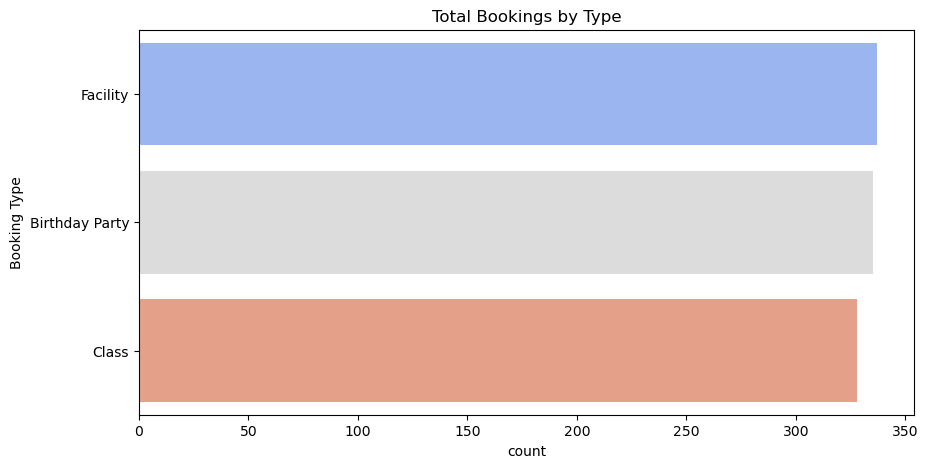

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Bookings by Type
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Booking Type"], order=df["Booking Type"].value_counts().index, palette="coolwarm")
plt.title("Total Bookings by Type")
plt.show()


# Create a SQLite Database

In [150]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")
df.to_sql("bookings", conn, index=False, if_exists="replace")


1000